# Préparation Réunion 10.12

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Fichiers FQMs

On dispose des fichiers : `fqm_[1-53]_2015`, `fqm_[1-52]_2016` et `fqm_[1-41]_2017`.

On a donc les estimations depuis le 01/01/2015 jusqu'au 22/10/2017.

Erreurs : 
* `fqm_35_2017` : pas d'estimations ... et d'onglet FQM_Definitive
* `fqm_12_2015` : pas de colonne LF% 

On a concaténé les fichiers restants dans une base `fqms_concat.csv`.

In [7]:
fqms = pd.read_csv(r"https://raw.githubusercontent.com/erialc-cal/StatApp_2020/main/temp_dir/fqms_concat_def.csv?token=AOXDVDLYCX63VNU3QJIXEDK72HTS6")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
fqms.head(5)

,Unnamed: 0,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,Semaine,CLE S/T
0,0,1.0,320,EZY,4060,A,OS,08:00:00,180.0,167.22,NCE,FR,MTP,H,1.0,0.929,J,1.0,000A,2014-12-29 00:00:00,180,150,2013-12-30 00:00:00,OSA2,1.0,OS1A1
1,1,1.0,320,EZY,4020,A,OS,10:00:00,180.0,167.22,TLS,FR,MTP,H,1.0,0.929,J,1.0,000A,2014-12-29 00:00:00,180,150,2013-12-30 00:00:00,OSA2,1.0,OS1A1
2,2,1.0,320,EZY,4062,A,OS,10:25:00,180.0,167.22,NCE,FR,MTP,H,1.0,0.929,J,1.0,000A,2014-12-29 00:00:00,180,150,2013-12-30 00:00:00,OSA2,1.0,OS1A1
3,3,1.0,320,EZY,4058,A,OS,11:20:00,180.0,167.22,NCE,FR,MTP,H,1.0,0.929,J,1.0,000A,2014-12-29 00:00:00,180,150,2013-12-30 00:00:00,OSA2,1.0,OS1A1
4,4,1.0,320,EZY,4022,A,OS,11:40:00,180.0,167.22,TLS,FR,MTP,H,1.0,0.929,J,1.0,000A,2014-12-29 00:00:00,180,150,2013-12-30 00:00:00,OSA2,1.0,OS1A1


In [51]:
fqms.sort_values(by='Date du vol', ascending=False).head(5)

,Unnamed: 0,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,Semaine,CLE S/T
49356,49356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VKO,158.0,NaN,NaN,NaN,NaN,NaN
49362,49362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TUN,158.0,NaN,NaN,NaN,NaN,NaN
49339,49339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TUN,158.0,NaN,NaN,NaN,NaN,NaN
49345,49345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TUN,158.0,NaN,NaN,NaN,NaN,NaN
49369,49369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TUN,158.0,NaN,NaN,NaN,NaN,NaN


Il y a un certain nombre de NaN dûs à une erreur de jointure pour l'un des fqms sans doute. Pour l'instant, on va les filtrer en attendant de corriger la jointure. 

In [56]:
fqms = fqms[fqms['Cie'].isnull()== False]

In [57]:
fqms.sort_values(by='Date du vol', ascending=False).head(5)

,Unnamed: 0,Jour,Tav,Cie,Ligne,A/D,Aérog,Hor,Sièges Corrections_ICI,Pax Estimés,Prov/Dst,Pays,Qualité,Crit. Douanier,Faisceau,LF%,IATA,Cpt Mvt,Faisc. IATA,Date du vol,NB Sieges specif,NB Sieges Standard,Date Equiv,CLE SYNTH.,Semaine,CLE S/T
656812,656812,7.0,772,AF,32,D,OW,14:20:00,309.0,185.0,JFK,US,INT,D,5.0,0.60,J,1.0,4500,2017-10-15 00:00:00,309,288,2016-10-16 00:00:00,OWD5,41.0,OW7D5
653620,653620,7.0,73H,TB,7612,D,OS,21:45:00,189.0,172.0,RAK,MA,INT,D,5.0,0.91,J,1.0,2401,2017-10-15 00:00:00,189,165,2016-10-16 00:00:00,OSD5,41.0,OS7D5
653618,653618,7.0,738,AT,781,D,OS,21:30:00,182.0,141.0,RBA,MA,INT,D,5.0,0.77,J,1.0,2401,2017-10-15 00:00:00,182,165,2016-10-16 00:00:00,OSD5,41.0,OS7D5
653617,653617,7.0,E90,AT,751,D,OS,21:30:00,96.0,96.0,CMN,MA,INT,D,5.0,1.00,J,1.0,2401,2017-10-15 00:00:00,96,80,2016-10-16 00:00:00,OSD5,41.0,OS7D5
653616,653616,7.0,744,SS,710,D,OS,21:20:00,533.0,404.0,MRU,MU,INT,D,5.0,0.76,J,1.0,3451,2017-10-15 00:00:00,533,435,2016-10-16 00:00:00,OSD5,41.0,OS7D5


Complétude totale en pourcentage de la base : 99.96622970429823 %


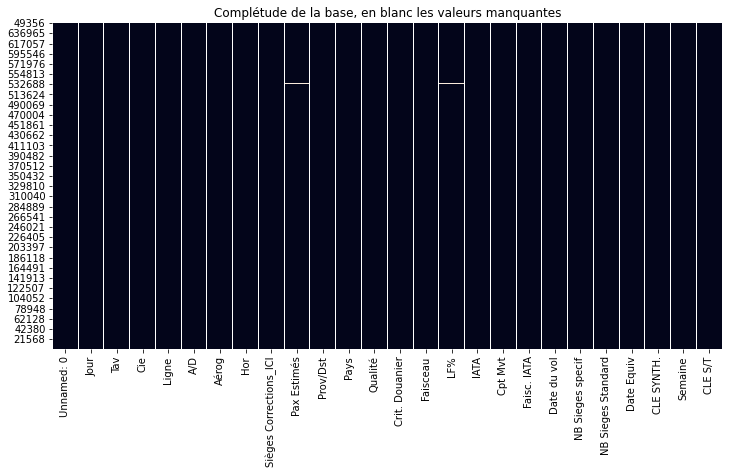

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(fqms.sort_values(by='Date du vol', ascending=False).isnull(), cbar=False)
plt.title('Complétude de la base, en blanc les valeurs manquantes')
print("Complétude totale en pourcentage de la base :", (1-fqms.isnull().sum().sum()/(len(fqms.index)*len(fqms.columns)))*100,'%')

On a une base de données complète de 229 343 estimations de vols :

In [ ]:
fqms.count()

Unnamed: 0                656813
Jour                      656768
Tav                       656768
Cie                       656768
Ligne                     656768
A/D                       656768
Aérog                     656768
Hor                       656768
Sièges Corrections_ICI    656768
Pax Estimés               654403
Prov/Dst                  656768
Pays                      656768
Qualité                   656768
Crit. Douanier            656768
Faisceau                  656768
LF%                       654403
IATA                      656768
Cpt Mvt                   656768
Faisc. IATA               656768
Date du vol               656812
NB Sieges specif          656812
NB Sieges Standard        656768
Date Equiv                656768
CLE SYNTH.                656768
Semaine                   656768
CLE S/T                   656768
dtype: int64

*Attention : les types de plusieurs colonnes sont passées en type 'object', notamment :*
- *les dates dans `Date du vol` et `Date Equiv`, ce qui est corrigé par la ligne de code suivante.*
- *mais aussi des colonnes comme `NB Sièges specif` où certaines valeurs ne sont pas des chiffres (ex : 'nc')...*

In [58]:
fqms = fqms.astype({'Date du vol': 'datetime64[ns]','Date Equiv': 'datetime64[ns]'})

In [ ]:
fqms.dtypes

## Fichier ENSAE

Le fichier `ENSAE.csv` contient des données par jour allant de 2013 à 2017

In [ ]:
ensae = pd.read_csv(r"https://raw.githubusercontent.com/erialc-cal/StatApp_2020/main/ENSAE.csv?token=AOXDVDKLTIEADEYEERRPKLS72ELQ6",sep=';')

In [ ]:
ensae = ensae.astype({'Jour': 'datetime64[ns]'})

In [ ]:
ensae.head(5)

La base est quasi complète, mais il manque certains faisceaux (géographiques comme de facturation), et beaucoup de valeurs dans la colonne `Total offre sièges` :

In [ ]:
ensae.count()

Jour                             338021
Faisceau géographique            314682
Faisceau facturation             314682
Type de mouvement                338021
Plateforme                       338021
Terminal                         338021
Nombre de mouvements réalisés    338021
Nombre de passagers réalisés     338021
Total offre sièges               201433
dtype: int64

In [ ]:
ensae.dtypes

Jour                             datetime64[ns]
Faisceau géographique                    object
Faisceau facturation                     object
Type de mouvement                        object
Plateforme                               object
Terminal                                 object
Nombre de mouvements réalisés             int64
Nombre de passagers réalisés              int64
Total offre sièges                      float64
dtype: object

Complétude totale en pourcentage de la base : 93.97585094154243 %


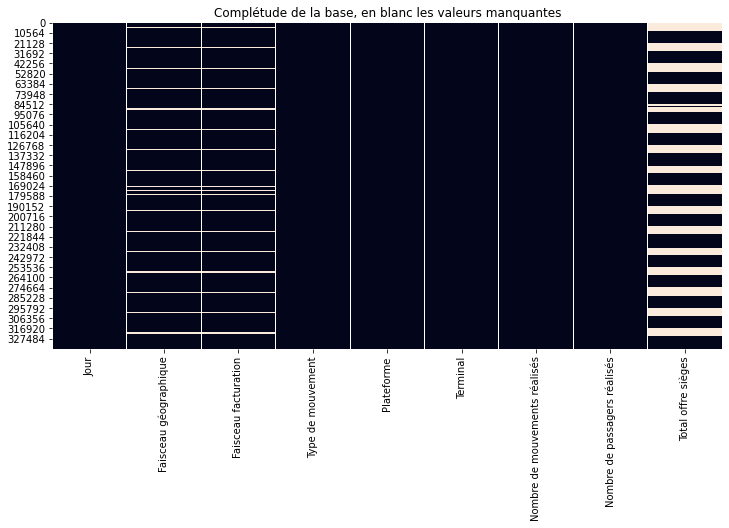

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(ensae.isnull(), cbar=False)
plt.title('Complétude de la base, en blanc les valeurs manquantes')
print("Complétude totale en pourcentage de la base :", (1-ensae.isnull().sum().sum()/(len(ensae.index)*len(ensae.columns)))*100,'%')

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 318kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
df_2 = ensae.copy()
df_2['Faisceau facturation'] = df_2['Faisceau facturation'].fillna('Inconnu')
df_2['Faisceau géographique'] = df_2['Faisceau géographique'].fillna('N/A')
import plotly.express as px
px.treemap(df_2, path=['Faisceau facturation','Faisceau géographique'])

In [ ]:
corr = ensae.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Nombre de mouvements réalisés,Nombre de passagers réalisés,Total offre sièges
Nombre de mouvements réalisés,1.000000,0.699422,0.835066
Nombre de passagers réalisés,0.699422,1.000000,0.953935
Total offre sièges,0.835066,0.953935,1.000000


### Observations Faisceaux et saisonnalité

In [ ]:
df = ensae.copy()
import datetime
df['Jour']=pd.to_datetime(df['Jour'])
df['Annee']= df['Jour'].dt.year
df['Mois']= df['Jour'].dt.month
df['Day']= df['Jour'].dt.day

In [ ]:
faisceaux =['Schengen', 'International', 'Autre UE', 'National', 'Dom Tom']

In [ ]:
df_Schengen = df[df['Faisceau facturation']== 'Schengen']
df_Int = df[df['Faisceau facturation']=='International']
df_UENS = df[df['Faisceau facturation']=='Autre UE']
df_Nat = df[df['Faisceau facturation']=='National']
df_DT = df[df['Faisceau facturation']=='Dom Tom']

Pour le **nombre de passagers réalisés** : 

Text(0.5, 1.0, 'Nombre de passagers réalisés par faisceau de facturation')

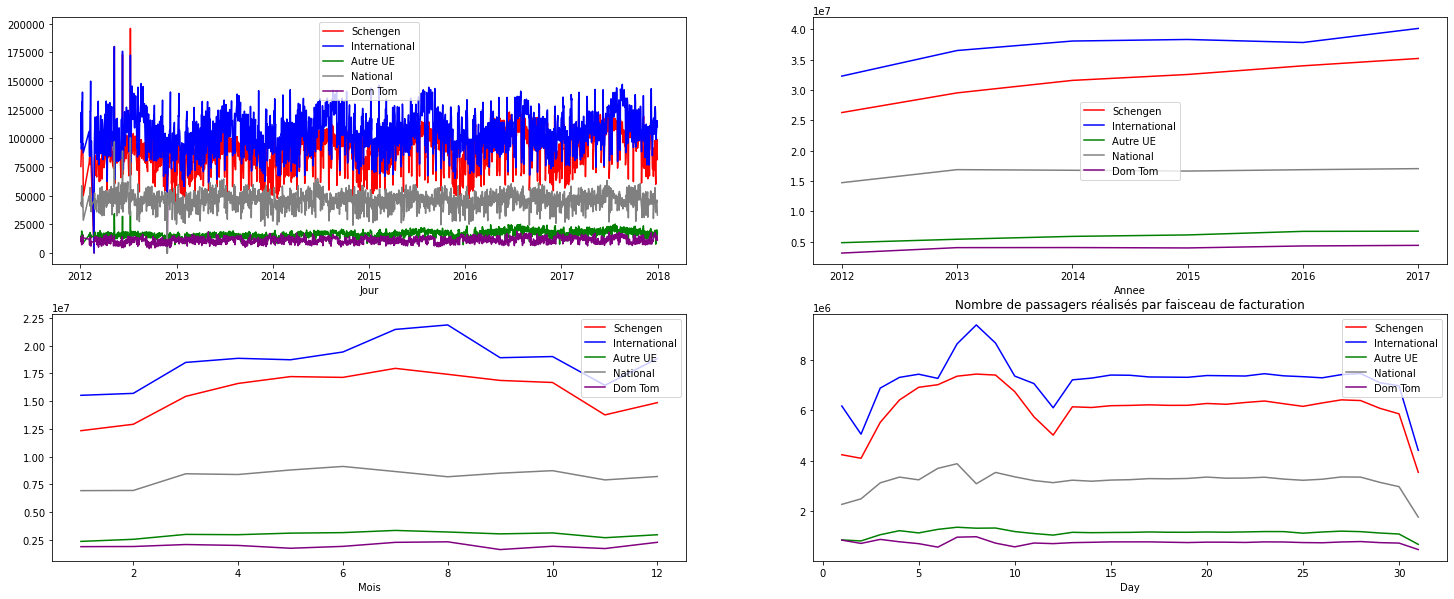

In [ ]:
colors = ['red','blue', 'green', 'grey', 'purple']
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(25,10))
for i in range(len(faisceaux)):
  df[df['Faisceau facturation']== faisceaux[i]].groupby('Jour').agg({'Nombre de passagers réalisés':'sum'}).plot(ax=axes[0,0],legend=True, subplots=True, color=colors[i])
  df[df['Faisceau facturation']==  faisceaux[i]].groupby('Annee').agg({'Nombre de passagers réalisés':'sum'}).plot(ax=axes[0,1],legend=True, subplots=True,color=colors[i])
  df[df['Faisceau facturation']==  faisceaux[i]].groupby('Mois').agg({'Nombre de passagers réalisés':'sum'}).plot(ax=axes[1,0],legend=True, subplots=True,color=colors[i])
  df[df['Faisceau facturation']==  faisceaux[i]].groupby('Day').agg({'Nombre de passagers réalisés':'sum'}).plot(ax=axes[1,1],legend=True, subplots=True,color=colors[i])
  axes[0,0].legend(faisceaux)
  axes[0,1].legend(faisceaux)
  axes[1,0].legend(faisceaux)
  axes[1,1].legend(faisceaux)
plt.title('Nombre de passagers réalisés par faisceau de facturation')



Comme on peut l'intuiter, la saisonnalité par mois est importante avec un pic de mouvements sur les mois juillet-août. D'autre part, le nombre de passagers est plus important sur la première quinzaine. Sur les 4 années recensées, le nombre de passagers est à la hausse pour les faisceaux Schengen et International surtout.  

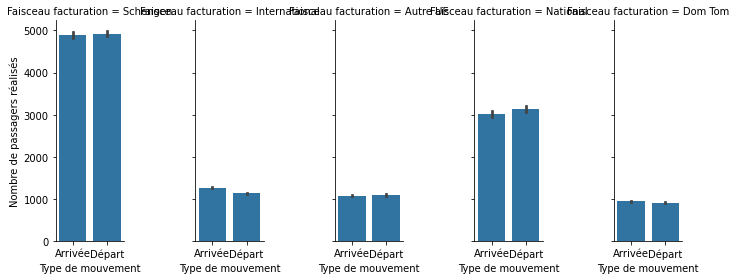

In [ ]:
g = sns.FacetGrid(df, col="Faisceau facturation", height=4, aspect=.5)
g.map(sns.barplot, "Type de mouvement", "Nombre de passagers réalisés", order=["Arrivée", "Départ"])

Pour le **nombre de mouvements réalisés** : 

Text(0.5, 1.0, 'Nombre de mouvements réalisés par faisceau de facturation')

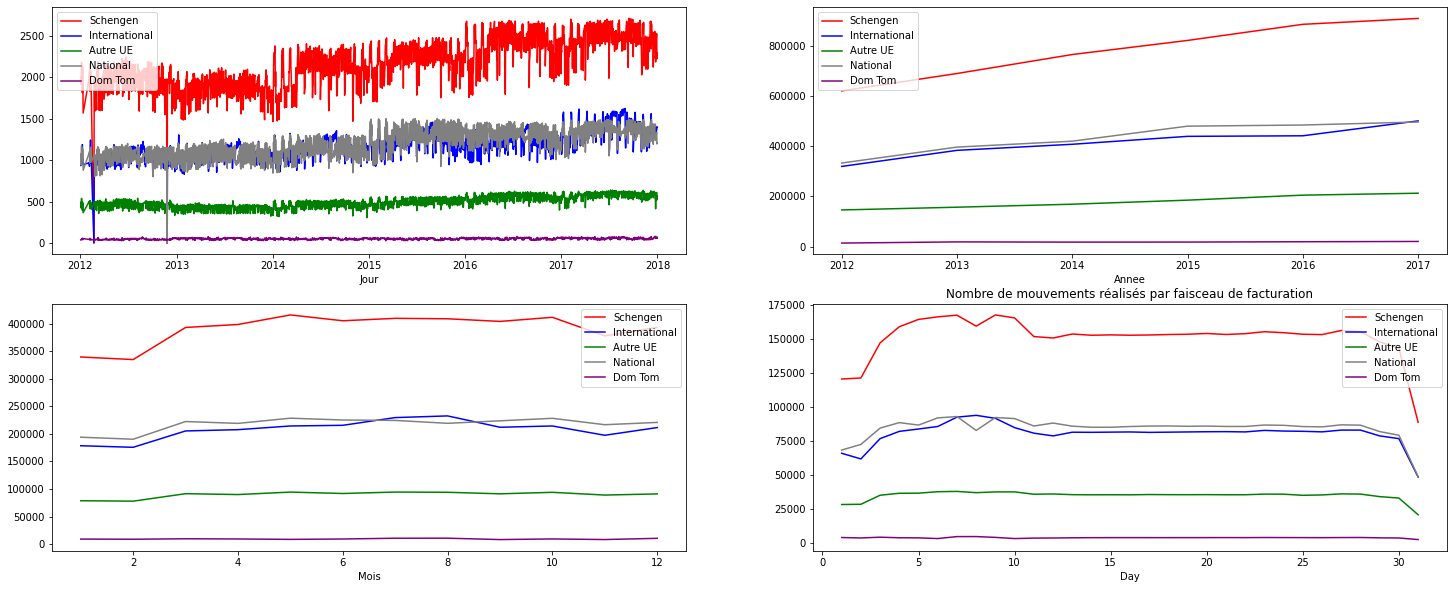

In [ ]:
colors = ['red','blue', 'green', 'grey', 'purple']
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(25,10))
for i in range(len(faisceaux)):
  df[df['Faisceau facturation']== faisceaux[i]].groupby('Jour').agg({'Nombre de mouvements réalisés':'sum'}).plot(ax=axes[0,0],legend=True, subplots=True, color=colors[i])
  df[df['Faisceau facturation']==  faisceaux[i]].groupby('Annee').agg({'Nombre de mouvements réalisés':'sum'}).plot(ax=axes[0,1],legend=True, subplots=True,color=colors[i])
  df[df['Faisceau facturation']==  faisceaux[i]].groupby('Mois').agg({'Nombre de mouvements réalisés':'sum'}).plot(ax=axes[1,0],legend=True, subplots=True,color=colors[i])
  df[df['Faisceau facturation']==  faisceaux[i]].groupby('Day').agg({'Nombre de mouvements réalisés':'sum'}).plot(ax=axes[1,1],legend=True, subplots=True,color=colors[i])
  axes[0,0].legend(faisceaux)
  axes[0,1].legend(faisceaux)
  axes[1,0].legend(faisceaux)
  axes[1,1].legend(faisceaux)
plt.title('Nombre de mouvements réalisés par faisceau de facturation')



La saisonnalité n'est presque pas influencée par le jour du vol pour les faisceaux Dom Tom, Autre UE, et un peu influencée pour les faisceaux Schengen, national et international avec davantage de mouvements réalisés en début de mois (2 premières semaines). On regarde le nombre de mouvements réalisés par mois, sur 2013 à 2017. Il y a moins de mouvement sur les mois de janvier, février et novembre dans les faisceaux Schengen, national. Le nombre de mouvements réalisés par an est à la hausse pour tous les faisceaux, avec une hausse plus rapide pour le faisceau Schengen.

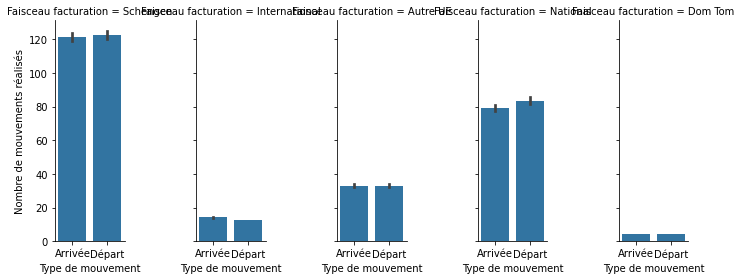

In [ ]:
g = sns.FacetGrid(df, col="Faisceau facturation", height=4, aspect=.5)
g.map(sns.barplot, "Type de mouvement", "Nombre de mouvements réalisés", order=["Arrivée", "Départ"])

## Visualisation

### Etude des FQMs

- Effet du jour de la semaine sur le taux de remplissage estimé :

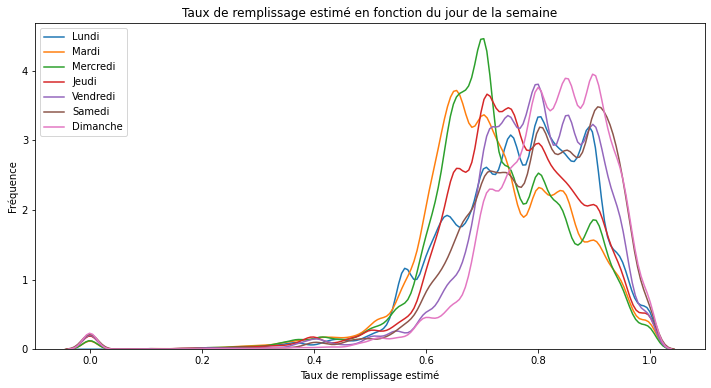

In [ ]:
jours=['Lundi','Mardi','Mercredi','Jeudi','Vendredi','Samedi','Dimanche']

# Toutes les jours sur la même figure :
plt.figure(figsize=(12,6))
for i in range(1,8) :
    sns.kdeplot(fqms['LF%'][fqms['Jour'].isin([i])],label=jours[i-1])
plt.xlabel('Taux de remplissage estimé')
plt.ylabel('Fréquence')
plt.title('Taux de remplissage estimé en fonction du jour de la semaine')
plt.legend()

Text(0.5, 0.98, 'Taux de remplissage estimé en fonction du jour de la semaine et du mouvement')

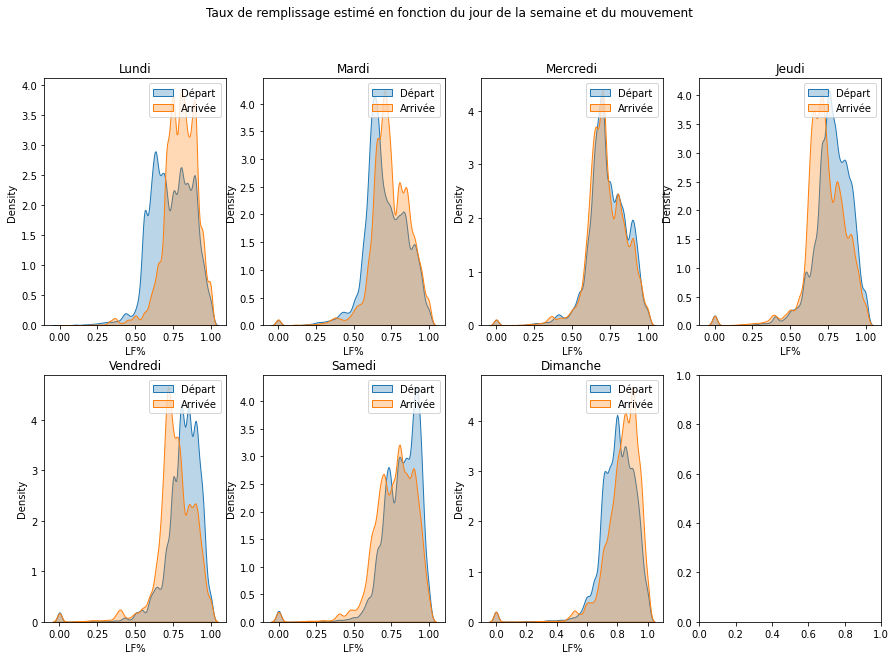

In [ ]:
# Détail :

fqms_depart = fqms[fqms['A/D'].isin(['D'])]
fqms_arrivee = fqms[fqms['A/D'].isin(['A'])]

fig,ax = plt.subplots(2, 4, figsize=(15, 10)) #, sharey=True
for i in range(7) :
    ax[(i//4,i%4)].set_title(jours[i])
    sns.kdeplot(fqms_depart['LF%'][fqms_depart['Jour'].isin([i+1])],ax=ax[(i//4,i%4)],fill=True, alpha=.3,label='Départ')
    sns.kdeplot(fqms_arrivee['LF%'][fqms_arrivee['Jour'].isin([i+1])],ax=ax[(i//4,i%4)],fill=True, alpha=.3,label='Arrivée')
    ax[(i//4,i%4)].legend()
    
fig.suptitle("Taux de remplissage estimé en fonction du jour de la semaine et du mouvement")

Text(0.5, 1.0, 'Boxplot du taux de remplissage estimé en fonction du jour de la semaine et du mouvement')

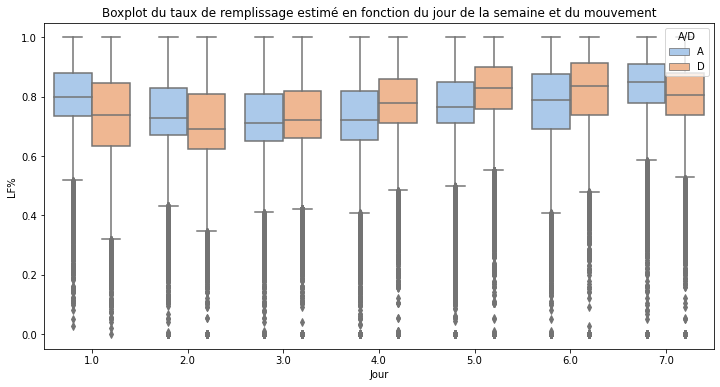

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(data=fqms, x="Jour", y="LF%", hue="A/D", palette="pastel")

plt.title("Boxplot du taux de remplissage estimé en fonction du jour de la semaine et du mouvement")

- Effet du faisceau sur le taux de remplissage estimé :

In [ ]:
#Correspondance qualité/faisceau :
fqms[['Faisceau','Qualité']].drop_duplicates()

,Faisceau,Qualité
0,1.0,MTP
13,2.0,SCH
51,3.0,DTM
57,5.0,INT
1712,4.0,CEE
49327,NaN,NaN


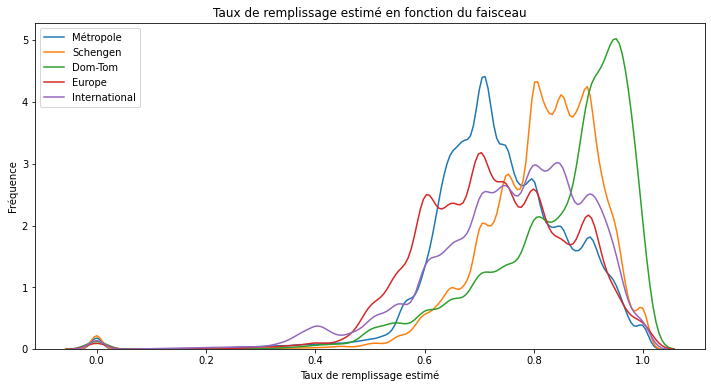

In [ ]:
faisceaux=['Métropole','Schengen','Dom-Tom','Europe','International']

# Toutes les faisceaux sur la même figure :
plt.figure(figsize=(12,6))
for i in range(1,6) :
    sns.kdeplot(fqms['LF%'][fqms['Faisceau'].isin([i])],label=faisceaux[i-1])
plt.xlabel('Taux de remplissage estimé')
plt.ylabel('Fréquence')
plt.title('Taux de remplissage estimé en fonction du faisceau')
plt.legend()

Text(0.5, 0.98, 'Taux de remplissage estimé en fonction du faisceau et du mouvement')

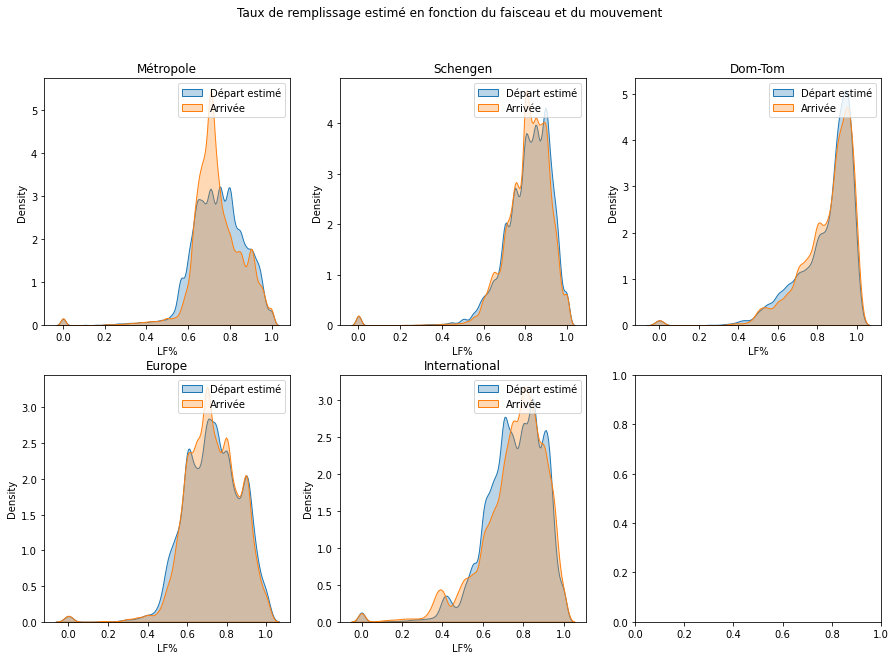

In [ ]:
#Détail

fig,ax = plt.subplots(2, 3, figsize=(15, 10)) 
for i in range(5) :
    ax[(i//3,i%3)].set_title(faisceaux[i])
    sns.kdeplot(fqms_depart['LF%'][fqms_depart['Faisceau'].isin([i+1])],ax=ax[(i//3,i%3)],fill=True, alpha=.3,label='Départ estimé')
    sns.kdeplot(fqms_arrivee['LF%'][fqms_arrivee['Faisceau'].isin([i+1])],ax=ax[(i//3,i%3)],fill=True, alpha=.3,label='Arrivée')
    ax[(i//3,i%3)].legend()
    
fig.suptitle("Taux de remplissage estimé en fonction du faisceau et du mouvement")

Text(0.5, 1.0, 'Boxplot du taux de remplissage estimé en fonction du faisceau et du mouvement')

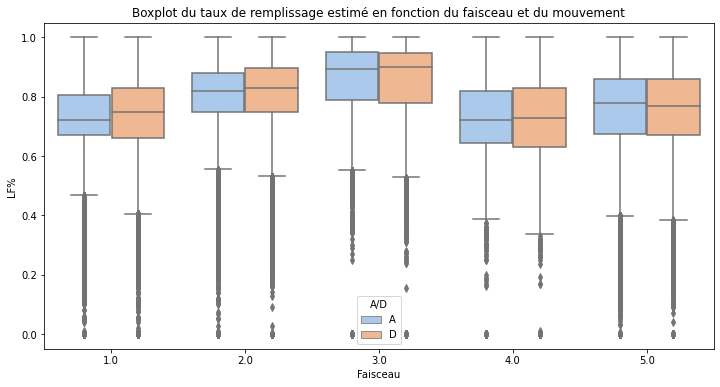

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(data=fqms, x="Faisceau", y="LF%", hue="A/D", palette="pastel")

plt.title("Boxplot du taux de remplissage estimé en fonction du faisceau et du mouvement")

### Comparaison des estimations avec les données réelles : 

On compare cette fois le nombre de passagers estimés dans les fqms (colonne `Pax Estimés`) avec les mouvements de passagers effectivement enregistrés dans la base `ENSAE` (colonne `Nombre de passagers réalisés`).

On commence par créer des bases `ensae_depart`et `ensae_arrivee`, et on ne garde que les dates correspondant aux dates des fqms :

In [ ]:
from datetime import date

In [ ]:
ensae_depart = ensae[ensae['Type de mouvement'].isin(['Départ'])]
ensae_depart['Date du Vol'] = ensae_depart['Jour'].dt.date
ensae_depart = ensae_depart[ensae_depart['Date du Vol']>date(2014,12,1)]
ensae_depart = ensae_depart[ensae_depart['Date du Vol']<date(2017,10,23)]

ensae_arrivee = ensae[ensae['Type de mouvement'].isin(['Arrivée'])]
ensae_arrivee['Date du Vol'] = ensae_arrivee['Jour'].dt.date
ensae_arrivee = ensae_arrivee[ensae_arrivee['Date du Vol']>date(2014,12,1)]
ensae_arrivee = ensae_arrivee[ensae_arrivee['Date du Vol']<date(2017,10,23)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ensuite, on fait des agrégations pour compter le nombre de passagers estimés par jour et par faisceaux :

In [ ]:
ensae_depart = ensae_depart.groupby(['Date du Vol','Faisceau facturation']).sum('Nombre de passagers réalisés')
ensae_depart = ensae_depart.reset_index()
ensae_arrivee = ensae_arrivee.groupby(['Date du Vol','Faisceau facturation']).sum('Nombre de passagers réalisés')
ensae_arrivee = ensae_arrivee.reset_index()

fqms_depart = fqms_depart.groupby(['Date du vol','Faisceau']).sum('Pax Estimés')
fqms_depart = fqms_depart.reset_index()
fqms_arrivee = fqms_arrivee.groupby(['Date du vol','Faisceau']).sum('Pax Estimés')
fqms_arrivee = fqms_arrivee.reset_index()

Text(0.5, 0.98, 'Comparaison du nombre de passagers estimé et effectif par faisceaux et type de mouvement')

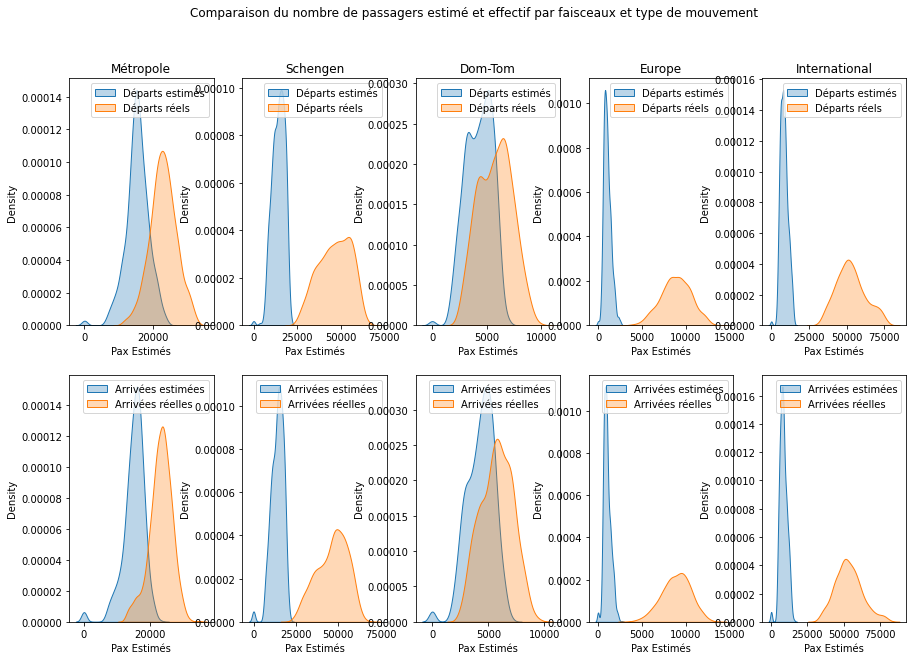

In [ ]:
faisceaux_ensae = ['National','Schengen','Dom Tom','Autre UE','International']

fig,ax = plt.subplots(2, 5, figsize=(15, 10)) 
for i in range(5) :
    ax[(0,i)].set_title(faisceaux[i])
    
    sns.kdeplot(fqms_depart['Pax Estimés'][fqms_depart['Faisceau'].isin([i+1])],ax=ax[(0,i)],fill=True, alpha=.3,label='Départs estimés')
    sns.kdeplot(ensae_depart['Nombre de passagers réalisés'][ensae_depart['Faisceau facturation'].isin([faisceaux_ensae[i]])],ax=ax[(0,i)],fill=True, alpha=.3,label='Départs réels')
    
    sns.kdeplot(fqms_arrivee['Pax Estimés'][fqms_arrivee['Faisceau'].isin([i+1])],ax=ax[(1,i)],fill=True, alpha=.3,label='Arrivées estimées')
    sns.kdeplot(ensae_arrivee['Nombre de passagers réalisés'][ensae_arrivee['Faisceau facturation'].isin([faisceaux_ensae[i]])],ax=ax[(1,i)],fill=True, alpha=.3,label='Arrivées réelles')
    
    ax[(0,i)].legend()
    ax[(1,i)].legend()
    
fig.suptitle("Comparaison du nombre de passagers estimé et effectif par faisceaux et type de mouvement")